# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Analysis and Cleaning

In [80]:
data1=pd.read_csv("rainfall in india 1901-2015.csv") #reading the csv file using pandas
data1.head() #checking the head to get an idea of the type of data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [81]:
data1.info() #getting a rough idea what exactly are the columns and finding for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

<AxesSubplot:>

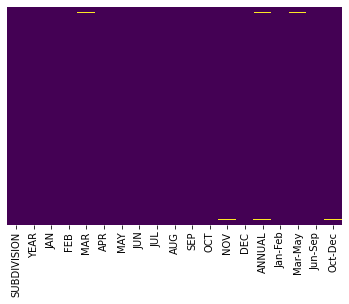

In [82]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap="viridis") #finding the null values

### Data Cleaning

In [83]:
data1['MAR'].fillna(value=np.mean(data1['MAR']),inplace=True) #replacing the null values in march by the mean
data1['NOV'].fillna(value=np.mean(data1['NOV']),inplace=True) #replacing the null values in november by the mean

<AxesSubplot:>

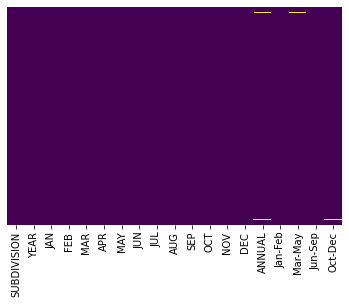

In [84]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap="viridis") #finding the null values

In [85]:
data1["Annual"]=data1["JAN"]+data1["FEB"]+data1["MAR"]+data1["APR"]+data1["MAY"]+data1["JUN"]+data1["JUL"]+data1["AUG"]+data1["SEP"]+data1["OCT"]+data1["NOV"]+data1["DEC"]

In [86]:
data1.drop("MAR-MAY",axis=1,inplace=True) #dropping the extra column
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap="viridis") #finding the null values

KeyError: "['MAR-MAY'] not found in axis"

In [87]:
data1.drop("ANNUAL",axis=1,inplace=True)#removing the ANNUAL COLUMN

In [88]:
data1["Mar-May"]=data1["MAR"]+data1["APR"]+data1["MAY"]#finding the sum and replacing the null values with it
data1["Oct-Dec"]=data1["OCT"]+data1["NOV"]+data1["DEC"]#same as above

In [52]:
data1.dropna().info() #removing all the null values and normalising the number of rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4095 non-null   object 
 1   YEAR         4095 non-null   int64  
 2   JAN          4095 non-null   float64
 3   FEB          4095 non-null   float64
 4   MAR          4095 non-null   float64
 5   APR          4095 non-null   float64
 6   MAY          4095 non-null   float64
 7   JUN          4095 non-null   float64
 8   JUL          4095 non-null   float64
 9   AUG          4095 non-null   float64
 10  SEP          4095 non-null   float64
 11  OCT          4095 non-null   float64
 12  NOV          4095 non-null   float64
 13  DEC          4095 non-null   float64
 14  Jan-Feb      4095 non-null   float64
 15  Mar-May      4095 non-null   float64
 16  Jun-Sep      4095 non-null   float64
 17  Oct-Dec      4095 non-null   float64
 18  Annual       4095 non-null   float64
dtypes: flo

<AxesSubplot:>

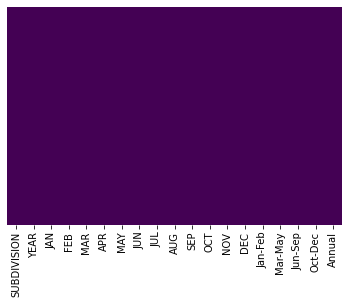

In [53]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap="viridis") #finding the null values

### Data Analysis

In [89]:
data1["SUBDIVISION"].value_counts()
#data1["YEAR"].value_counts()

SAURASHTRA & KUTCH                    115
EAST RAJASTHAN                        115
HARYANA DELHI & CHANDIGARH            115
SOUTH INTERIOR KARNATAKA              115
TELANGANA                             115
MADHYA MAHARASHTRA                    115
COASTAL KARNATAKA                     115
JHARKHAND                             115
JAMMU & KASHMIR                       115
EAST MADHYA PRADESH                   115
ASSAM & MEGHALAYA                     115
BIHAR                                 115
GUJARAT REGION                        115
CHHATTISGARH                          115
WEST MADHYA PRADESH                   115
SUB HIMALAYAN WEST BENGAL & SIKKIM    115
WEST RAJASTHAN                        115
UTTARAKHAND                           115
MATATHWADA                            115
RAYALSEEMA                            115
KERALA                                115
NAGA MANI MIZO TRIPURA                115
GANGETIC WEST BENGAL                  115
TAMIL NADU                        

In [90]:
dummy=pd.get_dummies(data1["SUBDIVISION"])

In [91]:
df=pd.concat([data1,dummy],axis=1)

In [92]:
df.dropna(inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4115
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SUBDIVISION                         4095 non-null   object 
 1   YEAR                                4095 non-null   int64  
 2   JAN                                 4095 non-null   float64
 3   FEB                                 4095 non-null   float64
 4   MAR                                 4095 non-null   float64
 5   APR                                 4095 non-null   float64
 6   MAY                                 4095 non-null   float64
 7   JUN                                 4095 non-null   float64
 8   JUL                                 4095 non-null   float64
 9   AUG                                 4095 non-null   float64
 10  SEP                                 4095 non-null   float64
 11  OCT                                 4095 no

<AxesSubplot:>

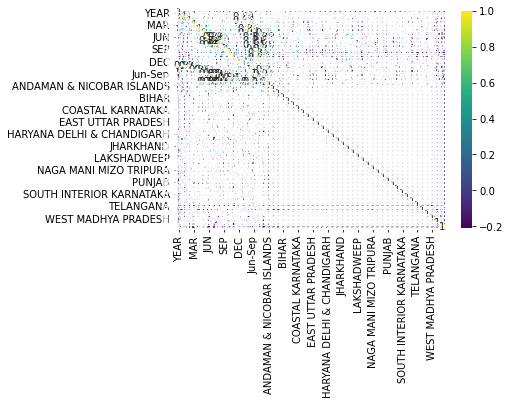

In [14]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

### Forming dates using time series/pandas in built date time

In [30]:
groups=data1.groupby('SUBDIVISION')['YEAR',"JAN",'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

<ipython-input-30-e10ad21201a7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups=data1.groupby('SUBDIVISION')['YEAR',"JAN",'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


In [59]:
data=groups.get_group('BIHAR').melt(['YEAR']).reset_index()#choose whatever state u want
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.columns=['INDEX','YEAR','MONTH','avg_rainfall']
months={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df['MONTH']=df['MONTH'].map(d)

In [63]:
df["DAY"]=1
df["DATE"]=pd.to_datetime(df.loc[:,["YEAR","MONTH","DAY"]])

In [68]:
main=df.drop(["YEAR","MONTH","INDEX","DAY"],axis=1).head()

### Standardising using MinMaxScaler

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec', 'Annual', 'ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'BIHAR', 'CHHATTISGARH', 'COASTAL ANDHRA PRADESH',
       'COASTAL KARNATAKA', 'EAST MADHYA PRADESH', 'EAST RAJASTHAN',
       'EAST UTTAR PRADESH', 'GANGETIC WEST BENGAL', 'GUJARAT REGION',
       'HARYANA DELHI & CHANDIGARH', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR',
       'JHARKHAND', 'KERALA', 'KONKAN & GOA', 'LAKSHADWEEP',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'NAGA MANI MIZO TRIPURA',
       'NORTH INTERIOR KARNATAKA', 'ORISSA', 'PUNJAB', 'RAYALSEEMA',
       'SAURASHTRA & KUTCH', 'SOUTH INTERIOR KARNATAKA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'TAMIL NADU', 'TELANGANA',
       'UTTARAKHAND', 'VIDARBHA', 'WEST MADHYA PRADESH', 'WEST RAJASTHAN',
       'WEST UTTAR PRADESH'],
      dtype='object')

In [110]:
X=df.drop(['SUBDIVISION','Annual'],axis=1)
y=df["Annual"]

In [109]:
#scaler=MinMaxScaler()
#X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.8146592e+18 -1.1755584e+18 -1.4097024e+18  8.5985280e+17
 -8.0481600e+17 -1.8067104e+18 -2.9453760e+17 -4.3139520e+17
 -6.4704960e+17 -1.8119808e+18  1.0018944e+18  6.2588160e+17
 -1.5884640e+18 -7.6265280e+17 -1.4569632e+18 -1.3281408e+18
 -8.8888320e+17 -1.1018592e+18 -1.3227840e+18 -5.4440640e+17
 -1.3912128e+18 -2.3760000e+16 -8.9951040e+17  5.9693760e+17
  1.1886048e+18 -2.1582720e+17  1.8403200e+17  1.1464416e+18
  5.2056000e+17  1.0774080e+17  1.0413792e+18 -9.0210240e+17
  4.0754880e+17 -7.9418880e+17 -4.6560960e+17 -1.9206720e+17
 -5.3136000e+17 -2.1696768e+18  1.4410656e+18 -1.4739840e+17
 -9.4944960e+17 -1.3334112e+18 -2.1644064e+18  6.3624960e+17
 -2.7622080e+17  6.3115200e+17  9.9662400e+17 -2.0749824e+18
 -2.0987424e+18 -1.5412032e+18 -1.6830720e+17  4.4176320e+17
 -1.8199296e+18 -1.3622688e+18  8.4939840e+17  2.3924160e+17
 -8.2581120e+17  1.3400640e+17  7.4416320e+17  1.1228544e+18
  1.6813440e+17 -4.0754880e+17  6.1266240e+17 -1.1887776e+18
 -1.3519008e+18 -1.0151136e+18 -1.3386816e+18  1.3543200e+18
 -3.9985920e+17 -1.0625472e+18  3.1285440e+17  1.4095296e+18
  7.8096960e+17 -2.2887360e+17 -1.5806016e+18  9.4400640e+17
  2.7604800e+17  1.0368000e+16 -6.2605440e+17 -2.0040480e+18
  1.6044480e+17  1.3332384e+18 -1.6226784e+18  1.1568960e+17
 -4.2076800e+17 -7.6792320e+17 -5.7335040e+17 -2.5773120e+17
  4.2586560e+17  1.0833696e+18  1.0247040e+17 -1.3150080e+17
  9.4936320e+17  1.1255328e+18  1.5249600e+17  1.2096000e+18
  4.7174400e+16 -1.4596416e+18  1.9975680e+17 -1.2256704e+18
 -2.1723552e+18 -2.1618144e+18 -1.3596768e+18 -6.8912640e+17
 -8.4326400e+16  1.4015808e+18 -1.6121376e+18 -6.3910080e+17
 -2.1066048e+18  3.8905920e+17  8.1777600e+17 -6.5759040e+17
 -4.8660480e+17  1.2753504e+18 -2.8399680e+17 -1.5043968e+18
 -2.1117024e+18 -1.2938400e+18 -6.7322880e+17 -2.0539008e+18
 -1.8987264e+18 -1.2596256e+18 -2.0329056e+18  4.6811520e+17
 -1.6174080e+18 -1.8619200e+18  1.4981760e+17 -5.2341120e+17
 -1.9881504e+18 -4.2612480e+17 -5.6289600e+17 -2.0591712e+18
  8.8871040e+17 -8.0213760e+17 -2.3941440e+17  5.4423360e+17
 -3.9718080e+17 -7.7587200e+17 -9.5472000e+17  1.1828160e+17
  1.2122784e+18  8.8093440e+17 -2.0196864e+18 -1.9355328e+18
  2.9177280e+17 -1.6674336e+18 -1.4412384e+18 -1.2334464e+18
 -8.1267840e+17  1.3437792e+18 -2.1168000e+16 -1.6989696e+18
 -1.8883584e+18  2.5246080e+17 -1.3417920e+17 -1.6409952e+18
  8.6745600e+16 -2.0408544e+18 -7.4433600e+17  3.9312000e+16
 -1.8152640e+17  1.1387520e+18  1.0517472e+18 -1.6962912e+18
 -1.8172512e+18  1.9198080e+17 -1.9671552e+18  7.6775040e+17
 -1.9014048e+18 -7.5470400e+17  1.4041728e+18 -9.1514880e+17
 -1.7436384e+18 -1.5253056e+18 -1.3702176e+18  4.5221760e+17
 -4.9982400e+17 -1.2991104e+18 -1.9223136e+18 -4.6828800e+17
  8.0455680e+17 -1.9093536e+18  5.5477440e+17  2.3397120e+17
  1.0623744e+18 -2.1824640e+17  1.1072160e+18 -1.3834368e+18
  8.8629120e+17  7.9669440e+17 -1.1572416e+18 -1.5595200e+18
  8.4680640e+17  2.6809920e+17 -1.3754880e+18  4.8116160e+17
  7.6515840e+17 -1.5227136e+18  4.3381440e+17  4.1800320e+17
 -1.9908288e+18 -1.9302624e+18 -2.8926720e+17 -2.0907936e+18
  4.7338560e+17 -9.9947520e+17 -1.0071648e+18  1.2779424e+18
 -1.6571520e+17  1.5508800e+17 -1.9751040e+18 -1.9566144e+18
 -3.1829760e+17 -1.9618848e+18 -9.7562880e+17  5.8112640e+17
  3.6547200e+17 -1.0310112e+18 -4.8392640e+17  3.2866560e+17
  7.2057600e+17 -1.1150784e+18  9.8867520e+17 -9.4694400e+16
  3.6633600e+16 -1.9039968e+18 -5.7602880e+17 -3.2356800e+17
  5.1528960e+17 -2.0145888e+18 -1.4385600e+18  8.1475200e+16
 -1.5515712e+18 -1.5911424e+18 -1.7960832e+18  1.2070080e+18
 -1.1965536e+18 -1.8671904e+18  5.6272320e+17 -1.5200352e+18
  1.3148352e+18 -2.1538656e+18 -9.9679680e+17 -1.5069888e+18
 -6.1810560e+17 -1.1545632e+18 -3.6806400e+16  7.3621440e+17
 -7.1280000e+17 -9.6793920e+17  1.1649312e+18 -1.7987616e+18
 -8.6002560e+17  4.5489600e+17  1.1727072e+18 -7.6006080e+17
 -1.7121024e+18  1.3201056e+18 -3.4447680e+17 -7.9056000e+16
  2.1565440e+17 -2.2092480e+17  9.3078720e+17  1.4331168e+18
 -2.1591360e+18 -2.5513920e+17 -4.2344640e+17  7.3362240e+17
 -1.2387168e+18 -1.3123296e+18  6.4419840e+17  7.1530560e+17
  7.7837760e+17 -1.4991264e+18  1.1964672e+18 -1.1992320e+18
  8.8361280e+17 -1.1318400e+17 -1.8040320e+18 -7.9686720e+17
  1.0464768e+18  7.0934400e+16  4.1022720e+17  1.2726720e+18
 -1.0203840e+18 -7.8114240e+17  1.0125216e+18 -1.5831936e+18
  1.6286400e+17 -1.5779232e+18  9.7303680e+17 -1.6200000e+18
 -1.9698336e+18 -1.7883936e+18  2.1297600e+17 -4.1290560e+17
  6.2847360e+17  2.4978240e+17 -1.5266880e+17 -1.8277056e+18
  1.2858912e+18 -1.1045376e+18  1.2096000e+17 -8.4430080e+17
  6.9422400e+17 -8.5207680e+17  7.5211200e+17 -1.2649824e+18
 -1.1625120e+18 -2.1774528e+18 -1.2307680e+18  1.2517632e+18
 -9.2836800e+17  1.0676448e+18  4.9965120e+17  1.0913184e+18
  4.1532480e+17  2.2602240e+17 -4.7433600e+16 -1.7253216e+18
 -9.9420480e+17 -1.8488736e+18  1.0729152e+18 -7.8382080e+17
 -3.0248640e+17 -1.9408896e+18  1.3305600e+18 -1.7014752e+18
  1.3753152e+18 -1.0888992e+18 -1.5174432e+18 -1.9960992e+18
 -1.8330624e+18 -1.3885344e+18  1.1149056e+18 -1.3202784e+18
  1.3673664e+18  5.2850880e+17 -8.6529600e+17  9.1782720e+17
 -1.2204000e+18 -8.7583680e+17  1.1991456e+18 -1.2887424e+18
 -1.0703232e+18 -1.7462304e+18 -2.1040128e+18 -8.2054080e+17
 -1.6698528e+18 -5.2704000e+15  1.1123136e+18  5.1001920e+17
 -1.7330112e+18  2.5755840e+17 -4.6301760e+17 -1.7226432e+18
 -8.1535680e+17  7.7042880e+17  2.3129280e+17 -8.8629120e+17
 -1.9854720e+18  8.6244480e+17 -6.3383040e+17  4.9170240e+17
 -4.4979840e+17 -1.5621984e+18 -2.5246080e+17 -1.6147296e+18
 -1.7515872e+18 -1.8303840e+18  1.2490848e+18  7.4943360e+17
  8.0196480e+17 -1.6910208e+18 -2.0697120e+18 -3.5769600e+17
 -1.8934560e+18 -2.0776608e+18 -6.8385600e+17  4.1904000e+16
  8.9665920e+17  1.3094784e+18 -9.0737280e+17 -9.4677120e+17
 -2.1143808e+18  7.6204800e+16  1.1045376e+18  4.1290560e+17
  8.9138880e+17 -1.2151296e+18 -8.4939840e+17  1.0149408e+18
 -1.1702880e+18 -2.4736320e+17 -2.9194560e+17  1.0491552e+18
 -9.8357760e+17 -1.4832288e+18  4.3649280e+17 -1.5674688e+18
 -1.0098432e+18 -1.1387520e+18  1.0361088e+18 -1.7146944e+18
 -2.1302784e+18  1.0045728e+18  2.4451200e+17 -1.2807936e+18
  1.7081280e+17 -6.1283520e+17 -2.0170080e+18 -1.4622336e+18
  7.5738240e+17  5.4682560e+17  1.2280896e+18 -1.4465088e+18
  1.3464576e+18 -3.5242560e+17 -1.2097728e+18  1.1623392e+18
 -2.0828448e+18 -2.4468480e+17  1.0440576e+18 -4.3666560e+17
  2.9436480e+17  4.8643200e+17 -7.3906560e+17  7.1789760e+17
 -3.6832320e+17 -2.3682240e+17 -1.6752096e+18 -9.7830720e+17
  1.0506240e+17 -1.1440224e+18 -4.0245120e+17 -1.7893440e+17
  1.3936320e+18 -2.6300160e+17 -1.0756800e+18 -1.1913696e+18
 -1.0941696e+18 -1.9830528e+18  1.2175488e+18  6.7046400e+17
 -8.6261760e+17 -7.9488000e+15 -1.6647552e+18  7.2316800e+17
 -5.5762560e+17 -1.8778176e+18 -1.0809504e+18 -5.9693760e+17
 -5.8924800e+17  1.2965184e+18 -1.9434816e+18  5.2531200e+16
  6.0471360e+17  1.2938400e+18 -1.9733760e+17 -8.6797440e+17
  6.9154560e+17  1.3068864e+18  7.0735680e+17  1.4383872e+18
 -2.1485952e+18 -1.1360736e+18  4.2059520e+17 -7.1807040e+17
 -2.0671200e+18  3.4214400e+16 -1.7383680e+18 -1.0835424e+18
 -6.6268800e+17  1.5638400e+16 -1.4754528e+18  5.7317760e+17
 -1.0572768e+18 -3.6305280e+17  9.1247040e+17 -7.4701440e+17
  1.2202272e+18 -4.0512960e+17 -3.6564480e+17  1.2832992e+18
  1.0228896e+18  6.0393600e+16  1.3726368e+18 -1.7594496e+18
  1.7608320e+17  7.0994880e+17 -1.5017184e+18  6.4946880e+17
 -1.2965184e+18  1.2307680e+18 -2.1381408e+18 -8.2321920e+17
 -1.3254624e+18 -1.5776640e+17 -5.8129920e+17  1.3989024e+18
  1.0649664e+18  3.6279360e+17  2.0243520e+17 -1.5938208e+18
 -1.7068320e+18  8.6512320e+17 -1.9172160e+18  2.0995200e+16
 -1.8671040e+17 -8.0740800e+17 -1.7625600e+17 -2.1196512e+18
 -1.2413088e+18 -2.4978240e+17  8.3358720e+17  1.1832480e+18
 -5.7075840e+17  9.0987840e+17 -1.2834720e+18 -1.0440576e+18
 -9.3363840e+17 -1.6067808e+18  2.1824640e+17 -1.6436736e+18
  7.4684160e+17  1.3517280e+18  1.4200704e+18 -1.9329408e+18
  5.4950400e+17 -1.9986912e+18  9.9394560e+17  3.8136960e+17
 -1.4306112e+18 -3.4715520e+17 -1.9539360e+18 -1.0362816e+18
  5.3913600e+17 -1.7751744e+18 -1.9803744e+18  3.5225280e+17
  9.7830720e+17  1.4463360e+18 -1.0264320e+17 -6.5232000e+17
 -1.0047456e+18 -3.2883840e+17  4.4694720e+17 -1.6830720e+18
 -1.4649120e+18  8.7566400e+17  1.4722560e+17 -1.5568416e+18
 -8.9683200e+17  1.3226976e+18 -7.0752960e+17 -1.8698688e+18
 -5.0224320e+17  1.0886400e+18 -7.1107200e+16 -2.0528640e+17
 -8.3108160e+17 -5.1287040e+17 -2.0276352e+18  9.2024640e+17
  1.0544256e+18  2.0770560e+17  1.1096352e+18 -1.8462816e+18
 -9.9964800e+16 -1.8724608e+18 -2.3146560e+17  5.0976000e+15
 -1.8645984e+18 -4.5239040e+17 -5.0760000e+17 -1.2071808e+18
 -1.4728608e+18 -4.5506880e+17  2.8131840e+17 -1.5897600e+16
  9.9792000e+16 -2.0564928e+18  9.5713920e+17  4.2854400e+17
  1.2623040e+17 -1.4472000e+17 -2.1670848e+18  4.6016640e+17
 -1.4859072e+18  6.9690240e+17  1.1333952e+18 -1.0125216e+18
  4.5748800e+17  2.3587200e+16  1.0596960e+18 -1.3781664e+18
  6.7573440e+17 -1.3543200e+18 -1.7857152e+18 -6.6795840e+17
 -2.0461248e+18  1.3700448e+18 -2.6835840e+17  1.3046400e+16
 -9.4158720e+17  3.7601280e+17 -4.6033920e+17 -1.1282976e+18
 -8.3376000e+17 -1.3360032e+18 -2.1276000e+18 -3.7869120e+17
 -2.0855232e+18  1.9448640e+17 -2.6784000e+15  1.0702368e+18
 -1.1072160e+18  2.4192000e+17 -7.6533120e+17 -1.8420480e+17
  6.1525440e+17 -1.5332544e+18 -1.1586240e+17 -8.9156160e+17
 -1.7724960e+18  3.4983360e+17  6.5750400e+16 -5.3377920e+17
 -3.7601280e+17 -6.8117760e+17  1.2806208e+18 -2.1328704e+18
 -1.8436032e+18  2.6023680e+17  3.9968640e+17  1.3805856e+18
 -1.6778016e+18  4.3122240e+17  1.3647744e+18 -5.8397760e+17
 -1.7041536e+18 -1.3858560e+18 -8.7324480e+17  9.5981760e+17
  8.6771520e+17  8.2563840e+17 -8.1786240e+17  6.3383040e+17
 -9.2568960e+17 -1.7645472e+18 -2.1355488e+18  6.4152000e+17
 -7.4174400e+17 -4.4712000e+17  7.9928640e+17  5.0224320e+17
  8.7039360e+17  3.4447680e+17  1.2358656e+18 -1.4332896e+18
 -8.1648000e+16 -1.5858720e+18 -2.1092832e+18 -1.0283328e+18
  1.3490496e+18 -1.5752448e+18 -2.0801664e+18 -2.0787840e+17
  5.7067200e+17 -9.4409280e+17  9.2819520e+17  1.3885344e+18
 -3.7091520e+17  1.1570688e+18 -4.9714560e+17  9.6776640e+17
  1.3411008e+18  1.1175840e+18 -7.3699200e+16 -1.7568576e+18
  3.3661440e+17 -1.8489600e+16  9.0720000e+17  1.2890880e+17
  2.2360320e+17 -1.7777664e+18  1.1438496e+18 -8.3903040e+17
  8.0723520e+17  8.7307200e+17 -1.9066752e+18 -6.3642240e+17
  1.0387008e+18  8.2831680e+17 -2.0381760e+18 -1.7804448e+18
 -1.1177568e+18 -1.6332192e+18  1.2570336e+18  7.7302080e+17
 -2.1564576e+18  4.8902400e+17  6.0998400e+17 -9.8884800e+17
 -1.5120864e+18  1.7876160e+17  9.9930240e+17  1.3659840e+17
  1.2464064e+18 -5.3913600e+17 -1.2702528e+18  9.4668480e+17
 -1.4884992e+18 -1.7831232e+18 -9.3631680e+17 -4.9455360e+17
  1.4173920e+18  1.2385440e+18 -7.3111680e+17  2.6282880e+17
 -8.9415360e+17  1.0992672e+18  9.0192960e+17 -1.7936640e+18
 -1.1204352e+18  3.3125760e+17  1.2543552e+18 -4.4452800e+17
 -9.5999040e+17 -1.6884288e+18  8.3885760e+17 -5.7862080e+17
 -1.8014400e+18 -2.0260800e+17  4.0227840e+17 -1.6594848e+18
  1.4454720e+17 -1.4438304e+18 -1.4070240e+18  1.1201760e+18
 -1.1257056e+18 -1.8568224e+18 -1.6462656e+18  1.8316800e+16
 -1.5306624e+18  1.2700800e+18  1.3280544e+18  8.5475520e+17
 -1.1676096e+18  6.8256000e+16 -1.6016832e+18 -4.9187520e+17
 -2.1747744e+18 -1.8830880e+18 -3.4205760e+17  1.2885696e+18
  3.2339520e+17  1.0202112e+18  1.0939968e+18 -1.0177920e+18
  8.0991360e+17 -4.3398720e+17  1.1411712e+18 -1.3439520e+18
 -4.7338560e+17 -3.1294080e+17  3.7869120e+17 -5.2868160e+17
 -5.1546240e+17  1.3596768e+18  1.1702880e+18 -8.6918400e+16
 -4.8133440e+17  4.8375360e+17 -7.1547840e+17 -3.8664000e+17
 -6.6000960e+17  7.3889280e+17  9.3346560e+17 -7.9945920e+17
  6.0739200e+17 -7.5738240e+17  9.6240960e+17 -2.1055680e+17
  1.1779776e+18 -9.0478080e+17 -1.9276704e+18  5.0492160e+17
 -6.9698880e+17 -2.2619520e+17  9.2016000e+16  1.6554240e+17
  5.5209600e+17 -1.6358976e+18 -1.1466144e+18 -8.9596800e+16
  1.1033280e+17 -1.1333952e+18 -1.6303680e+17  1.1517120e+18
  1.0860480e+18  5.2591680e+17 -4.8928320e+17 -5.6808000e+17
  3.4715520e+17 -2.7095040e+17 -3.8136960e+17 -1.9198944e+18
 -6.3158400e+16 -1.1098080e+18 -8.5734720e+17  6.3892800e+17
  5.9961600e+17  2.6550720e+17 -1.2890880e+17 -1.6515360e+18
 -1.8252000e+18  5.8639680e+17 -2.0723904e+18  4.9697280e+17
 -1.5727392e+18 -1.1835072e+18 -1.4200704e+18 -1.0782720e+18
 -1.1492928e+18 -6.2078400e+17  8.7834240e+17  6.7832640e+17
 -4.7606400e+17  8.5207680e+17 -8.1008640e+17 -2.0093184e+18
 -2.1408192e+18  9.2551680e+17  6.2061120e+17 -8.8361280e+17
 -1.1808288e+18 -1.6857504e+18 -1.7098560e+17 -1.6094592e+18
 -9.7372800e+16  6.5214720e+17  1.3132800e+17 -1.2911616e+18
 -2.8667520e+17 -1.4017536e+18  4.9438080e+17  1.1753856e+18
 -9.8098560e+17  1.4436576e+18 -3.4214400e+16 -1.4701824e+18
  4.3908480e+17 -1.6489440e+18 -1.7541792e+18 -2.6040960e+17
 -1.1230272e+18 -3.3151680e+17  7.9159680e+17 -6.9163200e+17
  5.0760000e+17  5.1796800e+17  7.2584640e+17 -1.6383168e+18
 -2.0881152e+18 -1.3944960e+17 -8.4170880e+17  1.3963104e+18
 -1.9382112e+18  1.8135360e+17 -6.9431040e+17 -1.3677120e+17
 -1.5436224e+18 -2.1432384e+18 -1.3492224e+18 -5.9961600e+17
 -1.1598336e+18  1.2334464e+18 -1.7409600e+18  3.1536000e+16
 -2.1249216e+18 -4.7865600e+17  8.5717440e+17  7.7760000e+15
  1.1543904e+18 -6.9958080e+17  1.3569984e+18 -3.7359360e+17
  3.3920640e+17 -1.6804800e+18  3.8646720e+17 -3.3937920e+17
 -8.3643840e+17  6.6778560e+17 -9.3104640e+17  7.3526400e+16
 -2.1314880e+17 -1.5147648e+18 -2.1223296e+18  1.3385088e+18
 -9.7053120e+17  9.3614400e+17 -1.4516928e+18  3.3393600e+17
  1.0176192e+18 -1.1649312e+18 -6.0480000e+16 -1.2755232e+18
 -1.5508800e+17  1.3253760e+18 -1.8356544e+18  1.1301120e+17
  7.7569920e+17 -1.9487520e+18 -1.3097376e+18  1.0780992e+18
 -9.5204160e+17 -1.8592416e+18  5.6799360e+17  7.0208640e+17
  7.9401600e+17  1.2254976e+18  8.4153600e+16  7.8364800e+17].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
model=LinearRegression()

In [114]:
model.fit(X_train,y_train)


LinearRegression()

In [115]:
preds=model.predict(X_test)

In [116]:
from sklearn import metrics

In [117]:
print(metrics.mean_absolute_error(y_test,preds))
print(metrics.mean_squared_error(y_test,preds))
print(np.sqrt(metrics.mean_squared_error(y_test,preds)))
print(metrics.r2_score(y_test,preds))

2.9326810539520906e-12
1.399628975778631e-23
3.741161551949649e-12
1.0
